In [1]:
# using PyPlot
using Distributions
using HypothesisTests
using SpecialFunctions

In [2]:
using Pkg
Pkg.add("Plots")
Pkg.add("Plotly")
using Plots

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
 Installed Plotly ────────────────────── v0.3.0
 Installed IteratorInterfaceExtensions ─ v1.0.0
 Installed FunctionalCollections ─────── v0.5.0
 Installed Mux ───────────────────────── v0.7.3
 Installed PlotlyBase ────────────────── v0.3.1
 Installed DocStringExtensions ───────── v0.8.3
 Installed WebIO ─────────────────────── v0.8.15
 Installed Lazy ──────────────────────── v0.15.1
 Installed DataValueInterfaces ───────── v1.0.0
 Installed Pidfile ───────────────────── v1.2.0
 Installed Hiccup ────────────────────── v0.2.2
 Installed AssetRegistry ─────────────── v0.1.0
 Installed Mustache ──────────────────── v1.0.8
 Installed WebSockets ────────────────── v1.5.2
 Instal

┌ Info: Recompiling stale cache file /home/zakgittins/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190


In [3]:
plotly()

┌ Info: For saving to png with the Plotly backend ORCA has to be installed.
└ @ Plots /home/zakgittins/.julia/packages/Plots/E3MWZ/src/backends.jl:373


Plots.PlotlyBackend()

In [6]:
x = -5:0.1:5
y = -5:0.1:5
z(x,y) = x.^2 .+ y.^2
surface(x, y, z)

<!DOCTYPE html>
 
 
 Plots.jl

In [21]:
X = 0:0.25:5
Y = X'
R = (X.^2 .+ Y.^2)^0.5


21×21 LinearAlgebra.Symmetric{Complex{Float64},Array{Complex{Float64},2}}:
 0.281913+0.724056im   0.283433+0.720153im   …   0.88979-0.837196im 
 0.283433+0.720153im    0.28496+0.716271im      0.894586-0.832683im 
 0.287992+0.708444im   0.289544+0.704625im      0.908976-0.819144im 
  0.29559+0.688928im   0.297183+0.685214im      0.932959-0.796579im 
 0.306228+0.661606im   0.307879+0.65804im       0.966534-0.764988im 
 0.319905+0.626478im    0.32163+0.623101im   …    1.0097-0.724371im 
 0.336622+0.583544im   0.338436+0.580398im       1.06247-0.674727im 
 0.356378+0.532803im   0.358299+0.529931im       1.12482-0.616058im 
 0.379173+0.474256im   0.381217+0.471699im       1.19677-0.548362im 
 0.405008+0.407903im   0.407191+0.405704im       1.27831-0.471641im 
 0.433882+0.333743im   0.436221+0.331944im   …   1.36944-0.385893im 
 0.465796+0.251777im   0.468307+0.25042im        1.47017-0.29112im  
 0.500749+0.162005im   0.503448+0.161132im       1.58049-0.18732im  
 0.538741+0.0644271im  0.541

# Day 4 Bayesian statistics

4.1 Bayesian approach       
4.2 Bayesian versus frequentist   
4.3 Additional topics  
4.4 Summary and additional questions    

## Recap of Day 3. Frequentist statistics

* Focus on type-I error rate: $\alpha=P($reject null$~ |~$null true$ )$


* Significance: unlikely event, from point of view of null statistics.


* Involves calculating probability of statistics given a hypothesis.


* Machinery can be applied to many different tests.


* Widespread usage, particularly in biological/medical literature.

# 4.1 Bayesian approach

4.1.1 Bayesian basics  
4.1.2 Likelihood function  
4.1.3 Discrete parameter example   
4.1.4 Continuous parameter example


## 4.1.1 Bayesian basics

* Reminder: Bayes theorem

$\hspace{0.8cm}$ $P(A|B)=\frac{P(B|A)P(A)}{P(B)}$


* Apply this to data $D$ and a hypothesis $H$.  
Allows to update beliefs using information from experiment:

$\hspace{0.8cm}$ $P(H|D)=\frac{P(D|H)P(H)}{P(D)}~~$ or $~~P(H|D)\propto P(D|H)P(H)$


* $P(H)$ is prior belief on the hypothesis $H$  
* $P(D|H)$ is called the likelihood: probability data given hypothesis.  
* $P(D)$ is probability of data - a normalisation constant.
 

## 4.1.2 Likelihood

* For independent data points, update as a product.

$\hspace{0.8cm}$ $P(H|\{D_k\})\propto \left[\prod_kP(D_k|H)\right]P(H)$

* Not always simple to calculate the likelihood $P(D_k|H)$  


* If there are two hypothesis $H_1$, $H_2$ then we can normalise this as follows


$\hspace{0.8cm}$ $P(H_1|\{D_k\})=\frac{1}{{\cal N}}\left[\prod_kP(D_k|H_1)\right]P(H_1)$  
$\hspace{0.8cm}$ $P(H_2|\{D_k\})=\frac{1}{{\cal N}}\left[\prod_kP(D_k|H_2)\right]P(H_2)$


* where ${ \cal N}=\left[\prod_kP(D_k|H_1)\right]P(H_1) + \left[\prod_kP(D_k|H_2)\right]P(H_2)$

## 4.1.3 Discrete parameter example

* Consider a game where one of two coins is used:  
one is fair $p_1=0.5$ the other is biased for heads $p_2=0.7$


* From experience the biased coin is used 20$\%$ of the time.


* We will associate the hypothesis $C_1$ and $C_2$ with the two coins.


* A coin is chosen and you see the following sequence: h, t, h, h, h, h, t, h


* **What is the prior distribution?**  
$P(C_1)=0.8$ and $P(C_2)=0.2$  


* **What are the two likelihoods for the first flip?**  
$P($h$|C)=p~$ so that $~P($h$|C_1)=0.5~$ and $~P($h$|C_2)=0.7$.


* **What is the posterior distribution after the first flip?**  
$P(C_1|$h$)=\frac{0.5\times0.8}{0.5\times0.8+0.7\times0.2}=0.741~$ and $~P(C_1|$h$)=\frac{0.7\times0.2}{0.5\times0.8+0.7\times0.2}=0.259$


* **<font color='red'>Question.</font>** What is the posterior distribution at the end of the sequence?

* **<font color='red'>Question.</font>** What would be the distribution if you had no prior knowledge?

In [6]:
((0.5^8)*0.8)/((0.5^8)*0.8+(0.7^6)*(0.3^2)*0.2) #this is probability of unbias coin guiven data

# (0.5^8)/((0.5^8)+(0.7^6)*(0.3^2)) 

0.5960689585979085

## 4.1.3 Discrete parameter example


* One coin fair $p_1=0.5$ the other is biased for heads $p_2=0.7$

* From experience the biased coin is used 20$\%$ of the time.

* So the priors are $P(C_1)=0.8$ and $P(C_2)=0.2$  

* A coin is chosen and you see the following sequence: h, t, h, h, h, h, t, h


* **<font color='green'>Answer.</font>** What is the posterior distribution at the end of the sequence?
* Likelihood $P(D|C)=p^6(1-p)^2$ so..
* $P(D|C_1)=0.00391$ and $P(D|C_2)=0.01059$  
* Combine priors and normalise to give posteriors 
* $P(C_1|D)=0.596$ and $P(C_2|D)=0.404$.  
* **Conclusion** more probable to be the unbiased coin.


* **<font color='green'>Answer.</font>** What would be the distribution if you had no prior knowledge?
* In this case $P(C_1)=0.5$ and $P(C_2)=0.5$ and likelihoods unchanged     
* posteriors are $P(C_1|D)=0.269$ and $P(C_2|D)=0.731$.  
* **Conclusion** more probable to be the biased coin.

## 4.1.4 Continuous parameter example

* A coin is flipped $N$ times with $n$ heads.


* What can we infer about it's bias? Mean gives $\hat{p}=n/N$. What else?


* Let's consider that the unknown parameter $p$ is like a random variable.


* Let $f_0(p)$ be the distribution of our prior view on $p$.  
* Let ${ \cal L}(D|p)$ be the likelihood (probability of data given $p$).  
* Let $f(p|D)$ be the posterior distribution on $p$.


* From Bayes  $f(p|D)=\frac{1}{ \cal N}{ \cal L}(D|p)f_0(p)$ where ${\cal N}=\int_0^1 dp'{ \cal L}(D|p')f_0(p')$.


*  **<font color='red'>Question.</font>** What is ${ \cal L}(D|p)$?


* **<font color='red'>Question.</font>** For a coin with a $0.7$ heads bias generate $20$ coin flips and   
update your prior. Use two priors: one uniform the other $\propto p(1-p).$   
**[HINT]** Discretise the range of $p$ and approximate the integrals as sums.


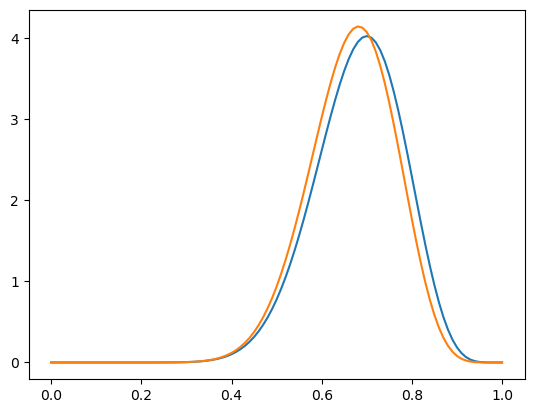

14.0

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f51da9809d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f51da980a00>

In [46]:
# generate coin flips

num = rand(20)
coin = zeros(20)
for i in 1:20
    if num[i]<0.7
        coin[i] = 1
    else
        coin[i]=0
    end
end

# n=sum(rand(N).>truep)

print(sum(coin))

dP = 0.01

N = Int64(1+(1/dP)) 

dPvec = dP*ones(N)

possP = 0:0.01:1

N = 1/dP

priorU = ones(length(N))
priorLogist = possP.*(1 .-possP)/beta(2,2)

L = Binprob.(possP, 20, sum(coin))

NormalizeU = sum(dP.*L.*priorU)
NormalizeLogist = sum(dP.*L.*priorLogist)

posteriorU = (L.*priorU)/NormalizeU
posteriorLogist = (L.*priorLogist)/NormalizeLogist

plot(possP, posteriorU, possP, posteriorLogist)


In [16]:
function Binprob(p, n, k)
    return binomial(n,k)*p^k*(1-p)^(n-k)
end

Binprob (generic function with 1 method)

In [41]:
typeof(0:0.01:1)

StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}

In [2]:
# set up p
dp=0.01
p=collect(dp/2:dp:1.0-dp/2) # Magnus uses the central value for getting the integral
np=length(p)

# set up the prior
f0=ones(np); # a flat prior
f1=p.*(1 .-p)/beta(2,2); # non-flat prior beta(2,2) normalises

# coin flips
truep=0.7
N=21
n=sum(1*(rand(N).<truep))
println("Number of heads=$n out of $N coin flips")

# likelihood and normalisation
L=binomial(N,n)*(p.^n).*(1 .-p).^(N-n)
NL0=sum(L.*f0*dp)
NL1=sum(L.*f1*dp)

# posterior
fpost0=L.*f0/NL0;
fpost1=L.*f1/NL1;


Number of heads=15 out of 21 coin flips


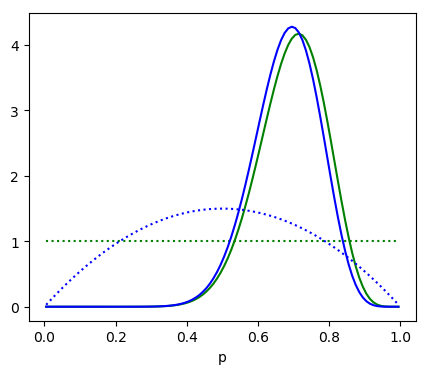

In [3]:
# plot out the results
figure(figsize=(5,4))
plot(p,fpost0,"g",p,f0,"g:"); xlabel("p")
plot(p,fpost1,"b",p,f1,"b:"); 

# 4.2 Bayesian versus frequentist 

4.2.1 Berger and Berry (1988)  
4.2.2 p-value depends on the intent  

## 4.2.1 Berger and Berry (1988)

* Frequentist approach often justified as avoiding subjective/unknown prior  


* Influencial paper (600+ citations) challenging objectivity of frequentist approach  
http://www2.hawaii.edu/~cbaajwe/Ph.D.Seminar/BergerandBerry1988.pdf



**The experiment**
* Test if vitamin C (C) has an effect on cold symptoms versus a placebo (P)
* 17 identical twins, one gets C the other P
* Results: 13 taking C get better first, 4 taking P get better first.
* What is the significance of this result?


* Need to calculate the p-value and compare with, say $5\%$ or $1\%$ levels.  
* What is the distribution under the null hypothesis (no effect of vitamin C)?    
$\hspace{0.8cm} P(C=k|H_0)={{17}\choose{k}}(0.5)^{17}$

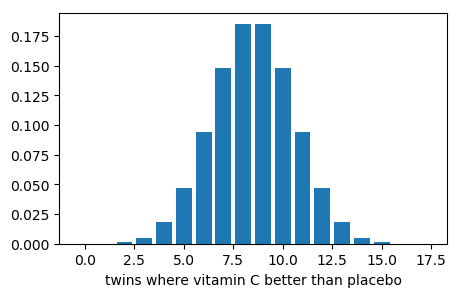

In [4]:
k=collect(0:17)
Pk=pdf.(Binomial(17,0.5),k);
figure(figsize=(5,3));
bar(k,Pk); xlabel("twins where vitamin C better than placebo");

* The result was 13, so as extreme is $k=0,1,2,3,4$ and $13,14,15,16,17$.  

* The p-value is $2\sum_{k=0}^4P_k=0.049$ and just within the $5\%$ significance range.



## 4.2.2 p-value depends on the intent  

* This seems objective, but what if another experiment was envisaged?   


* **For example:**   
Stop when you have at least 4 where C is better and 4 where P is better.


* Imagine the 4th P occured on the 17th trial, generating an identical data set.  


* The null distribution will be very different.  


* Hopefully it won't affect the p-value... 


* **<font color='red'>Question.</font>** Check the p-value for this experiment by generating artifical data.  
The statistic now is the number of trials (twins). 


In [93]:
C = 0
P = 0
p = 0.8
while C<4 || P<4 
    if rand()<p
        C+=1
    else
        P+=1
    end
end

######################

vec = collect(17:31)
pval = sum(pdf.(Binomial.(vec, 0.5),3))
print(P, ", ", C, ", ", pval)

4, 8, 0.01272327406331897

In [88]:
vec = 8:1:17-1

8:1:16

In [5]:
# to finish at k twins, but have three with C better so far and then the last trial as C
# or the same for P. 
# this looks like (k-1)!/(3!(k-1)!)*p^3(1-p)^(k-4)*p + same again
# which is just Binomial(n=k-1,p=0.5) evaluated with an argument of 3

x=1:30
y=zeros(30)
for k=8:30
    y[k]=pdf(Binomial(k-1,0.5),3)
end

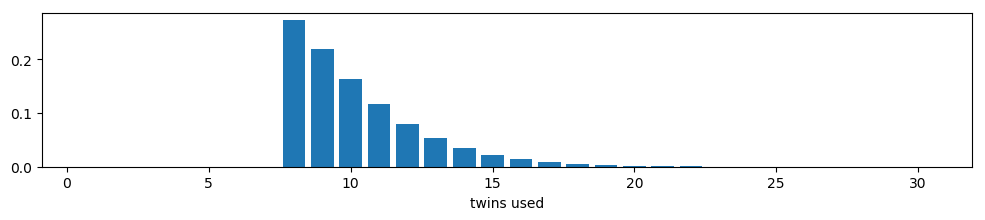

In [6]:
# Note: My figure differs from Berry and Berger (1988). 
# I think their first two bars are transposed (a graphical typo) - you can check this!
# In any case, the p-value comes out the same.
figure(figsize=(12,2))
bar(x,y)
xlabel("twins used");

In [7]:
pvalue=sum(y[17:end])
println("pvalue=$(round(pvalue*100;digits=1))%");

pvalue=2.1%


* Now the p-value is now 2.1% !


* Differs from the 4.9% from other experiment - but data is identical. 


* What if the experimentalist quit after taking the measurements, without explaining what the experimental design was? Could the data be used?


* Hard to justify scientifically... 


# 4.3 Additional topics

4.3.1 Conjugate priors  
4.3.2 Credible intervals  

## 4.3.1 Conjugate priors

* For the coin with the unknown bias we discretized the space of $p$.  
* This might get numerically expensive with many variables (bins).
* Numerical integration can be avoided if there is a congugate prior.  
* Allows for a low-dimensional parameterisation of a continuous prior.

**Example**  

* The conjugate prior to the Binomial distribution is a Beta distribution $p_{\alpha\beta}$  
where $p_{\alpha\beta}=p^{\alpha-1}(1-p)^{\beta-1}/B(\alpha,\beta)$ and $B(\alpha,\beta)=\Gamma(\alpha)\Gamma(\beta)/\Gamma(\alpha+\beta)$


* Imagine we start with a Beta-distribution prior parameterised by $\alpha$ and $\beta$.  
* **<font color='red'>Question:</font>** Show that if a coin is flipped $n_h+n_t$ times with $n_h$ heads and $n_t$ tails,   
the posterior is a Beta distribution with $\alpha'=\alpha+n_t$ and $\beta'=\beta+n_h$.

## 4.3.1 Conjugate priors

**Example**  

* The conjugate prior to the Binomial distribution is a Beta distribution $p_{\alpha\beta}$  
where $p_{\alpha\beta}=p^{\alpha-1}(1-p)^{\beta-1}/B(\alpha,\beta)$ and $B(\alpha,\beta)=\Gamma(\alpha)\Gamma(\beta)/\Gamma(\alpha+\beta)$


* Imagine we start with a Beta-distribution prior parameterised by $\alpha$ and $\beta$.  
* Show that if a coin is flipped $n_h+n_t$ times with $n_h$ heads and $n_t$ tails,   
the posterior is a Beta distribution with $\alpha'=\alpha+n_t$ and $\beta'=\beta+n_h$. 


* **<font color='green'>Answer:</font>** 

* The likelihood is ${n_h+n_t\choose n_h}p^{n_h}(1-p)^{n_t}$  
* So the posterior is proportional to $\frac{1}{B(\alpha,\beta)}{n_h+n_t\choose n_h}p^{\alpha+n_h}(1-p)^{\beta+n_t}$   
* The prefactor cancels in the normalisation, which has a function form:  

$\hspace{0.7cm}$ $\int_0^p dp p^{\alpha+n_h}(1-p)^{\beta+n_t}=B(\alpha+n_h,\beta+n_t)$ 

$\hspace{0.7cm}$ from the Beta distribution normalisation.



## 4.3.2 Credible intervals

* These are analagous to the frequentist confidence intervals.


* They have a more direct interpretation using the posterior distribution.


* There is some choice. A 95% credible interval could be:  
(1) A distribution, with 2.5% discounted on each tail.  
(2) The shortest interval containing 95% of the density    


* Example for the coin with the unknown bias (using a Beta distribution).

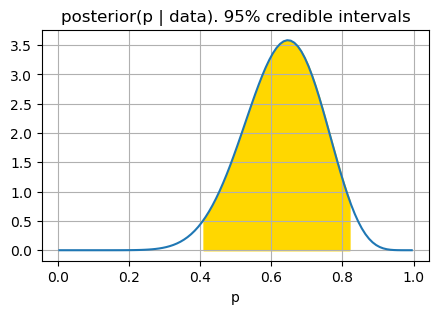

In [8]:
# The case with 2.5% discounted on each tail

dp=0.01
p=collect(dp/2:dp:1.0-dp/2)
a,b=12,7

f=pdf.(Beta(a,b),p);
p1=invlogcdf.(Beta(a,b),log(0.025))
p2=invlogcdf.(Beta(a,b),log(0.975))
pp=p1:dp:p2
ff=pdf.(Beta(a,b),pp)

figure(figsize=(5,3))
plot(p,f); xlabel("p"); title("posterior(p | data). 95% credible intervals")
fill_between(pp,0,ff,color="gold"); grid();

# 4.4 Summary and additional questions

## Day 4 Bayesian statistics

4.4.1 Frequentist versus Bayesian       
4.4.2 Likelihood tests  
4.4.3 Bayesian statistics   
4.4.4 Summary and additional questions    

---

## Questions

Make sure you have understood and done all the questions in the lectures.

The questions below are to be emailed in for marking by 12noon Thursday 26th November 2020 (together with those from yesterday).   

**Q4.4.1** Maximum likelihood: normal distribution  
**Q4.4.2** Posterior for normal distribution    
**Q4.4.3** Shortest credible interval  

## <font color='red'>Q4.4.1</font>  Maximum likelihood: normal distribution

* Consider a sample $X_1\cdots X_n$ from a normal distribution.

* What is the likelihood they were drawn from a distribution with parameters  
mean $\mu$ and variance $\sigma^2$.

* What values $\hat{\mu}$ and $\hat{\sigma}^2$ maximise this likelihood? 

* Is $\hat{\sigma}^2$ a biased or unbiased estimator?


## <font color='red'>Q4.4.2</font> Posterior for normal distribution 

* For some choice of $\mu$ and $\sigma^2$, generate $n=5$ normally distributed random numbers.


* Using a flat prior, calculate the posterior density $p(\mu,\sigma|X_1\cdots X_n)$.  


* Note this is a two-dimensional density. You will have to create a 2D grid of data points.


* Plot the 2D distribution.


* Calculate the maximum-likelihood parameters $\hat{\mu}$ and $\hat{\sigma}^2$ using your formula from Q4.1. Confirm that their coordinates coincide with the peak of the posterior distribution.


* Use the posterior distribution to calculate the marginal distributions for $\mu$ and $\sigma$ and plot these. Do their peaks also coincide with $\hat{\mu}$ and $\hat{\sigma}^2$?

In [13]:
x= [1.0:0.1:5;]; y= [4.0:0.1:9.0;]; f(x,y)= sin(x)*cos(y);
p1= surface( x, y, f,      camera=(30,30), legend=false, title="camera 30 30 (default)", size=[800,500] );
plot(p1)

<!DOCTYPE html>
 
 
 Plots.jl

In [11]:
using Plots
x= [1.0:0.1:5;]; y= [4.0:0.1:9.0;]; f(x,y)= sin(x)*cos(y);
pl= plot(x, y, f, title="camera 30 30 (default)", legend=false, seriestype=:wireframe, size=[800,500]);
pr= plot( deepcopy(pl), camera=(80,60), title="camera 80 60", legend=false, seriestype=:wireframe);
plot( pl, pr, layout=2 )

<!DOCTYPE html>
 
 
 Plots.jl

In [19]:
?

search: ⊻ ⊋ ⊊ ⊉ ⊈ ⊇ ⊆ ≥ ≤ ≢ ≡ ≠ ≉ ≈ ∪ ∩ ∛ √ ∘ ∌ ∋ ∉ ∈ ℯ π ÷ ~ | ^ \ > < : / - +



**Welcome to Julia 1.0.5.** The full manual is available at

```
https://docs.julialang.org/
```

as well as many great tutorials and learning resources:

```
https://julialang.org/learning/
```

For help on a specific function or macro, type `?` followed by its name, e.g. `?cos`, or `?@time`, and press enter. Type `;` to enter shell mode, `]` to enter package mode.


In [56]:
μ_true = 5
σ_true = 3
dμ = 0.1
dσ = 0.1
μ_range = reshape(2:dμ:12, (101,1)) #create a range of possible values to check over. Note for μ this could be infinite in theory.
σ_range = reshape(1:dσ:8, (1,71))

samp = rand(Normal(μ_true, σ_true), 5) #generate data
print(mean(samp), ", ", sqrt((1/5)*sum((samp.-mean(samp)).^2))) #calculates the bais estimator

function likely(μ, σ) # likelihood function
    n = length(samp)
    return exp(-0.5*σ^-2*sum((samp.-μ).^2))*(2*pi*σ^2)^(-n/2)
end

prior = 1

posterior(x, y) = likely.(x, y)
POSTerior(x, y) = likely.(x,y)

surface(2:dμ:12, 1:dσ:8, POSTerior, xlabel = "μ", ylabel = "σ") # from my current understanding, surface() prefers to have inputs of arrays and functions

# post = (likely.(μ_range, σ_range)*prior)/sum(sum(dμ*prior*likely.(μ_range, σ_range))) #integral is not right



# surface(μ_range, σ_range, post)

5.155393571948724, 1.8907045279376566

<!DOCTYPE html>
 
 
 Plots.jl

In [24]:
argmax(posterior(μ_range, σ_range))
posterior(μ_range[47], σ_range[26])

1.6890179835420623e-6

In [32]:
x= [1.0:0.1:5;]; y= [4.0:0.1:9.0;]; f(x,y)= sin(x)*cos(y);
p1= surface( x, y, f,      camera=(30,30), legend=false, title="camera 30 30 (default)", size=[800,500] );
plot(p1)

<!DOCTYPE html>
 
 
 Plots.jl

In [34]:
x = 1:0.1:5;
y = 1:0.1:5;
f(x,y) = (x+y)^2
p2 = surface(x, y, f)
plot(p2)

<!DOCTYPE html>
 
 
 Plots.jl

In [37]:
typeof(x)

StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}

In [40]:
μ_range = reshape(2:dμ:8, (61,1))
size(μ_range)

(61, 1)

In [37]:
new = reshape(σ_range, (1, 41))
size(new)

(1, 41)

In [48]:
likely.(μ_range, σ_range)

61×41 Array{Float64,2}:
 1.52013e-26  1.28656e-22  1.16178e-19  …  3.66753e-7  3.64227e-7  3.60407e-7
 8.2252e-26   5.1932e-22   3.75263e-19     3.94639e-7  3.90762e-7  3.85589e-7
 4.23348e-25  2.01138e-21  1.17076e-18     4.23724e-7  4.18358e-7  4.11705e-7
 2.07268e-24  7.4749e-21   3.52794e-18     4.53967e-7  4.46971e-7  4.38712e-7
 9.65281e-24  2.66546e-20  1.02682e-17     4.85313e-7  4.76547e-7  4.66557e-7
 4.27622e-23  9.11993e-20  2.8866e-17   …  5.177e-7    5.07023e-7  4.95177e-7
 1.80199e-22  2.99409e-19  7.83791e-17     5.51051e-7  5.38327e-7  5.24503e-7
 7.22317e-22  9.43177e-19  2.05558e-16     5.85278e-7  5.70374e-7  5.54456e-7
 2.75417e-21  2.85086e-18  5.20701e-16     6.20284e-7  6.03071e-7  5.84949e-7
 9.98935e-21  8.2682e-18   1.27398e-15     6.55959e-7  6.36317e-7  6.15885e-7
 3.44643e-20  2.30092e-17  3.01063e-15  …  6.92182e-7  6.69999e-7  6.47162e-7
 1.13107e-19  6.1439e-17   6.87184e-15     7.28821e-7  7.03995e-7  6.78669e-7
 3.53095e-19  1.57414e-16  1.51499e-14  

## <font color='red'>Q4.4.3</font> Shortest credible interval 

*  In section 4.3.2 the credible interval for a Beta distribution with $a=12$ and $b=7$ was calculated using a 2.5% discount on each tail. Correct to three decimal places, the range was $x=0.410\to0.827$.  


* Another way of calculating the 95% credible interval is to pick the shortest range that includes 95% of the distribution. What are the values of $x$ on either side of this range, correct to three decimal places? Confirm this range is slightly shorter than the 2.5% discounted one.  

In [6]:
x = [1 3 4 5 6]

1×5 Array{Int64,2}:
 1  3  4  5  6

In [7]:
y = [4 3]
x.+y

DimensionMismatch: DimensionMismatch("arrays could not be broadcast to a common size")

In [64]:
function likely(μ, σ)
    X = [1 2 3 4 5]
    n = length(X)
    return exp(-0.5*σ^-2*sum((X.-μ).^2))*(2*pi*σ^2)^(-n/2)
end

likely (generic function with 1 method)

In [65]:
likely.([1; 2; 3; 4],[5 6 7 8 9 10])

4×6 Array{Float64,2}:
 1.77469e-6  8.56718e-7  4.42703e-7  2.43957e-7  1.42204e-7  8.69773e-8
 2.39559e-6  1.05515e-6  5.15925e-7  2.74288e-7  1.56e-7     9.37515e-8
 2.64753e-6  1.13103e-6  5.42931e-7  2.85214e-7  1.6089e-7   9.61248e-8
 2.39559e-6  1.05515e-6  5.15925e-7  2.74288e-7  1.56e-7     9.37515e-8

In [23]:
X = [1 2 3 4 5]
length(X)

5

In [31]:
exp(-0.5*8^(-2)*(1+4+9+1))*(2*pi*8^2)^(-5/2)

2.742878116351787e-7